# Análise comparativa

In [ ]:
geral = pd.concat([df_long_knn, df_long_svc, df_long_mlp, df_long_tree, df_long_forest, df_long_comiteMlp, df_long_xgb, df_long_lgbm, df_long_comiteHet], axis=0)

In [ ]:
geral = pd.read_csv("resultados.csv")
#geral.to_csv("resultados1.csv", index=False)
geral

,modelo,etapa,métrica,valor
0,knn,treino,accuracy,0.889450
1,knn,teste,accuracy,0.861751
2,knn,treino,f1,0.923556
3,knn,teste,f1,0.904372
4,knn,treino,recall,0.948566
...,...,...,...,...
83,comiteHet,teste,recall,0.934850
84,comiteHet,treino,precision,0.912214
85,comiteHet,teste,precision,0.900330
86,comiteHet,treino,auc,0.000000


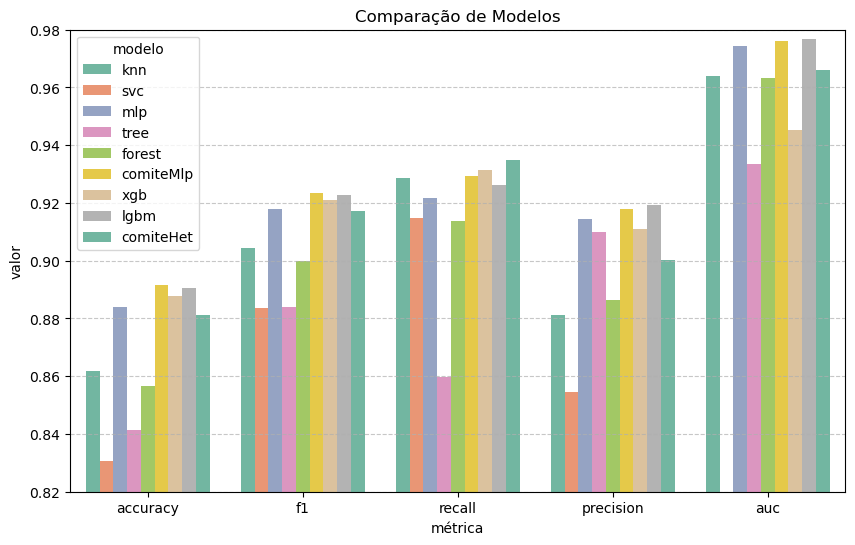

In [ ]:
geral_teste = geral[geral["etapa"] == "teste"]
plt.figure(figsize=(10, 6))
sns.barplot(geral_teste, x="métrica", y="valor", hue="modelo", palette="Set2")
plt.title("Comparação de Modelos")
plt.ylim(0.82, 0.98)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

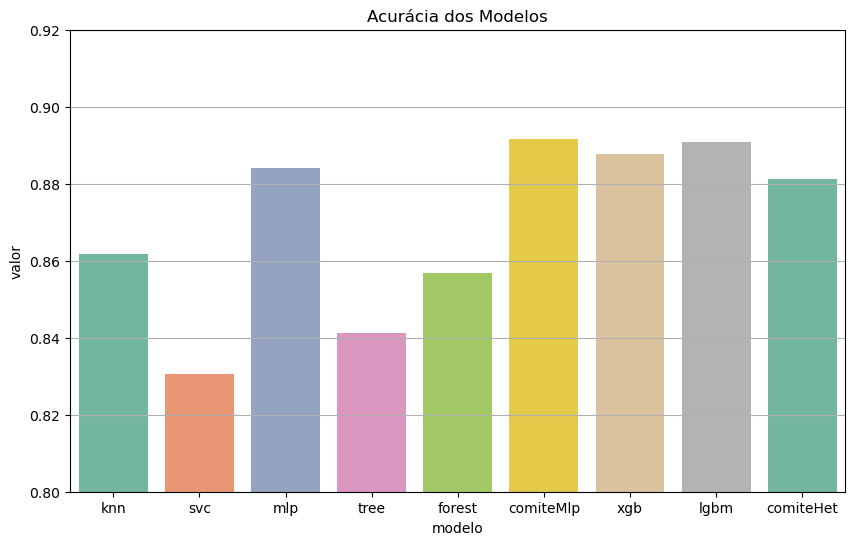

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Acurácia dos Modelos")
plt.ylim(0.8, 0.92)
sns.barplot(geral_teste[geral_teste["métrica"]=="accuracy"], x="modelo", y="valor", palette="Set2")
plt.show()

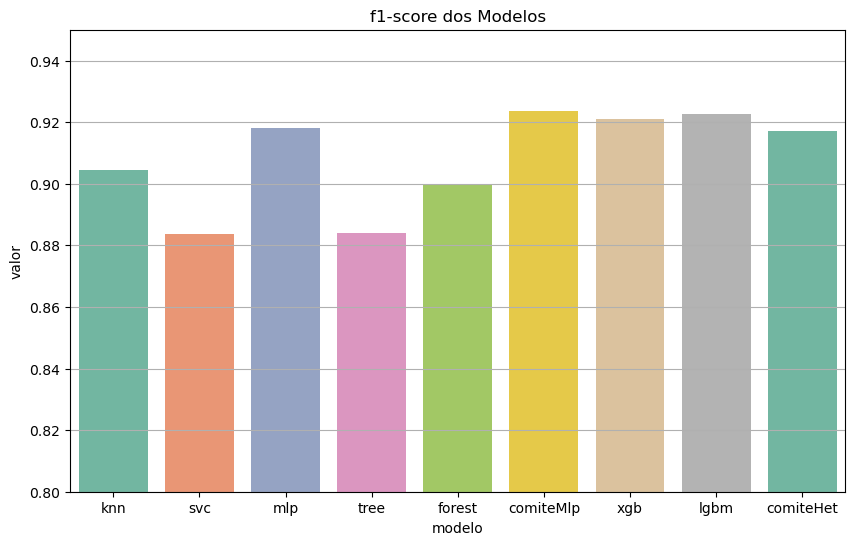

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("f1-score dos Modelos")
plt.ylim(0.8, 0.95)
sns.barplot(geral_teste[geral_teste["métrica"]=="f1"], x="modelo", y="valor", palette="Set2")
plt.show()

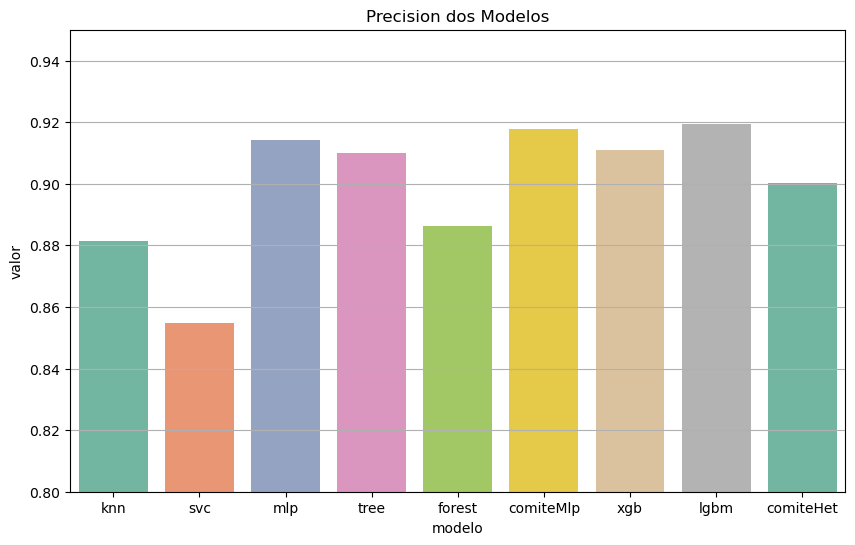

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Precision dos Modelos")
plt.ylim(0.8, 0.95)
sns.barplot(geral_teste[geral_teste["métrica"]=="precision"], x="modelo", y="valor", palette="Set2")
plt.show()

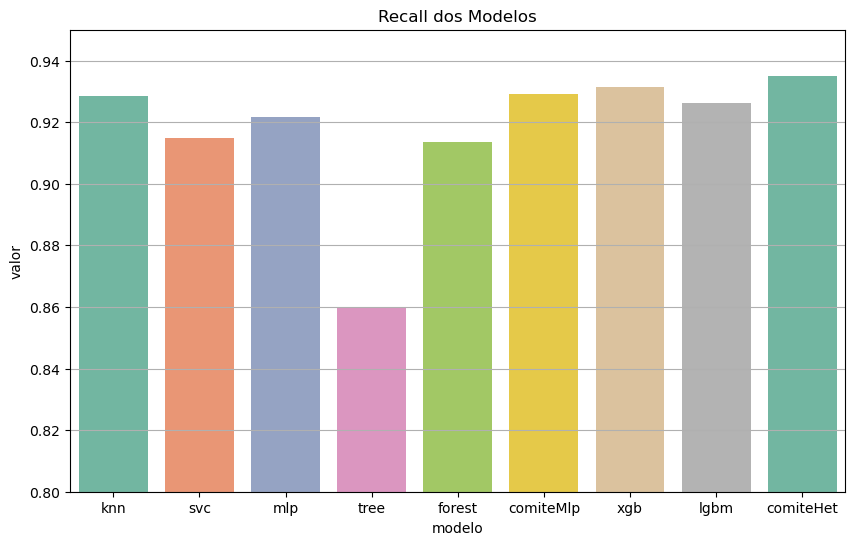

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Recall dos Modelos")
plt.ylim(0.8, 0.95)
sns.barplot(geral_teste[geral_teste["métrica"]=="recall"], x="modelo", y="valor", palette="Set2")
plt.show()

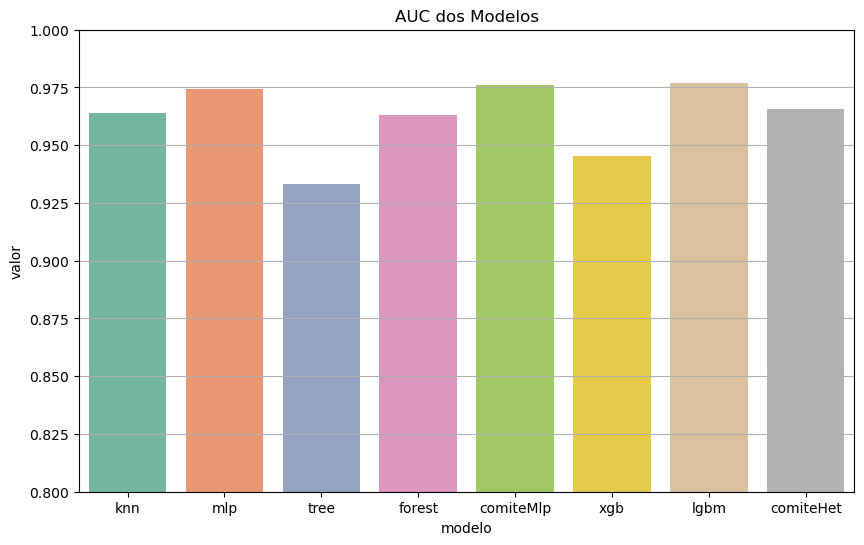

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("AUC dos Modelos")
plt.ylim(0.8, 1)
sns.barplot(geral_teste[geral_teste["métrica"]=="auc"], x="modelo", y="valor", palette="Set2")
plt.show()

In [ ]:
geral_teste[geral_teste["métrica"]=="accuracy"].sort_values(by="valor", ascending=False)

,modelo,etapa,métrica,valor
1,comiteMlp,teste,accuracy,0.891595
1,lgbm,teste,accuracy,0.890718
1,xgb,teste,accuracy,0.887645
1,mlp,teste,accuracy,0.884134
1,comiteHet,teste,accuracy,0.881282
1,knn,teste,accuracy,0.861751
1,forest,teste,accuracy,0.856704
1,tree,teste,accuracy,0.841343
1,svc,teste,accuracy,0.830590


In [ ]:
geral_teste[geral_teste["métrica"]=="f1"].sort_values(by="valor", ascending=False)

,modelo,etapa,métrica,valor
3,comiteMlp,teste,f1,0.923482
3,lgbm,teste,f1,0.922671
3,xgb,teste,f1,0.921085
3,mlp,teste,f1,0.918038
3,comiteHet,teste,f1,0.917266
3,knn,teste,f1,0.904372
3,forest,teste,f1,0.899770
3,tree,teste,f1,0.884116
3,svc,teste,f1,0.883770


In [ ]:
geral_teste[geral_teste["métrica"]=="recall"].sort_values(by="valor", ascending=False)

,modelo,etapa,métrica,valor
5,comiteHet,teste,recall,0.934850
5,xgb,teste,recall,0.931421
5,comiteMlp,teste,recall,0.929239
5,knn,teste,recall,0.928616
5,lgbm,teste,recall,0.926122
5,mlp,teste,recall,0.921758
5,svc,teste,recall,0.914900
5,forest,teste,recall,0.913653
5,tree,teste,recall,0.859726


In [ ]:
geral_teste[geral_teste["métrica"]=="precision"].sort_values(by="valor", ascending=False)

,modelo,etapa,métrica,valor
7,lgbm,teste,precision,0.919245
7,comiteMlp,teste,precision,0.917796
7,mlp,teste,precision,0.914348
7,xgb,teste,precision,0.910976
7,tree,teste,precision,0.909931
7,comiteHet,teste,precision,0.900330
7,forest,teste,precision,0.886302
7,knn,teste,precision,0.881361
7,svc,teste,precision,0.854688


In [ ]:
pesos = {"accuracy": 1, "f1": 2.5, "recall": 2, "precision": 1.5, "auc":2}
geral_teste["peso"] = geral_teste["métrica"].map(pesos)
geral_teste["valor_ponderado"] = geral_teste["valor"] * geral_teste["peso"]

top_4 = geral_teste.groupby("modelo")["valor_ponderado"].mean().nlargest(4)
top_4

C:\Users\Usuário\AppData\Local\Temp\ipykernel_14156\2603687169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geral_teste["peso"] = geral_teste["métrica"].map(pesos)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_14156\2603687169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geral_teste["valor_ponderado"] = geral_teste["valor"] * geral_teste["peso"]


modelo
comiteMlp    1.677587
lgbm         1.676427
mlp          1.668621
comiteHet    1.665281
Name: valor_ponderado, dtype: float64

In [ ]:
top_4 = geral_teste[geral_teste["modelo"].isin(top_4.index)]
top_4


,modelo,etapa,métrica,valor,peso,valor_ponderado
1,mlp,teste,accuracy,0.884134,1.0,0.884134
3,mlp,teste,f1,0.918038,2.5,2.295095
5,mlp,teste,recall,0.921758,2.0,1.843516
7,mlp,teste,precision,0.914348,1.5,1.371521
9,mlp,teste,auc,0.974419,2.0,1.948838
1,comiteMlp,teste,accuracy,0.891595,1.0,0.891595
3,comiteMlp,teste,f1,0.923482,2.5,2.308705
5,comiteMlp,teste,recall,0.929239,2.0,1.858479
7,comiteMlp,teste,precision,0.917796,1.5,1.376693
9,comiteMlp,teste,auc,0.976230,2.0,1.952460


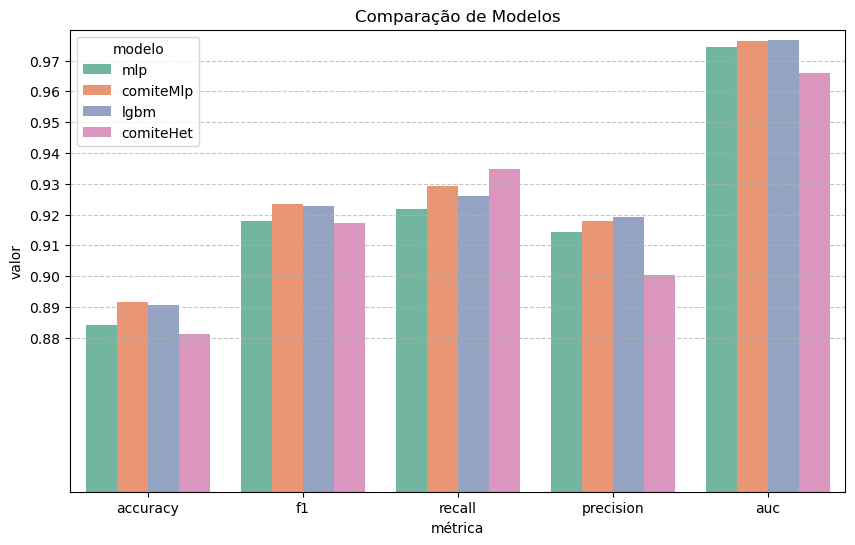

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(top_4, x="métrica", y="valor", hue="modelo", palette="Set2")
plt.title("Comparação de Modelos")
plt.yticks(ticks=np.arange(0.88,0.98,0.01))
plt.ylim(0.83, 0.98)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()